# Web and Cloud Computing (DATA 534): Lab 3
## General Lab Instructions

- I added an Intro section to help you with the basics for this lab.

# Intro

In this lab you will be called to interact programmatically with Amazon's AWS cloud platform. The choice of the platform is to a certain extent arbitrary (many competitors offer similar services), yet AWS still seems to be a standard goto in many companies. More importantly, the skills that you will acquire in dealing with AWS are also useful when approaching the alternatives.

Resources:
- I strongly advise you to read [this datacamp tutorial](https://www.datacamp.com/community/tutorials/aws-ec2-beginner-tutorial).
- If you have a couple hours, you can watch [this video](https://www.youtube.com/watch?v=IFdBD3YdLJc&feature=youtu.be) which is a great introductory lecture.


Note:
- **Windows users** (recommended but not required): For this lab it might be worthy for you to install the Linux subsystem for Windows (see [here](https://docs.microsoft.com/en-us/windows/wsl/install-win10)). As for the distribution, I suggest you to go with Ubuntu 18. Doing that you can connect with your AWS server just with one line in the linux bash (in fact, it is also possible doing the same thing with powershell, except it is a bit trickier to define permissions in Windows - I can try to help you if you want. Alternatively, you can use [PuTTY](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/putty.html).)

## Using AWS's instances (EC2) and storage (S3) to do analysis in the cloud



### Exercise 1.1 - Starting an instance and installing stuff
rubric={accuracy:15,mechanics:5}

- Launch a Linux (I would suggest an Ubuntu) EC2 instance (select it from the free tier, “t2.micro”);
- ssh into it;
- Install the below list of dependencies. Record how long this takes.
    + update your server (`sudo apt-get update; sudo apt-get upgrade`)
    + python's `pip` (if not already there; in Ubuntu is a oneliner `sudo apt-get install python3-pip` on the command line)
    + [install AWS CLI](https://docs.aws.amazon.com/cli/latest/userguide/installing.html).
    + R (again, on a Ubuntu is a oneliner: `sudo apt-get install r-base`, but see [here](http://randyzwitch.com/r-amazon-ec2/) for fuller discussion);

Provide a screenshot proving what you have installed.

**SSH into EC2 instance:** `ssh -i "534.pem" root@ec2-18-191-232-158.us-east-2.compute.amazonaws.com`



**Install R:** `sudo apt-get install r-base` <br/>
**Install pip:** `sudo apt-get install python3-pip` <br/>
**Install AWS CLI:** `sudo ./aws/install`


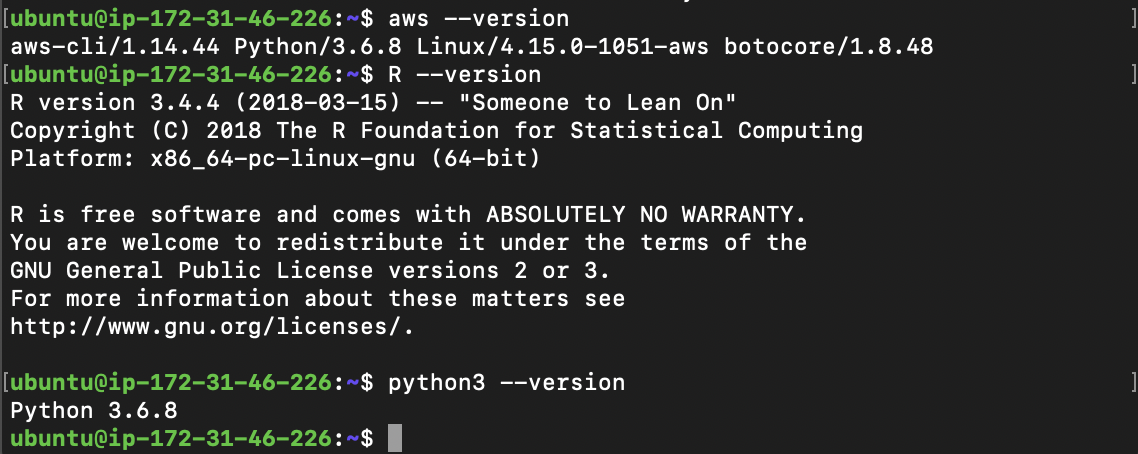

### Exercise 1.2 - Speeding things up by saving computing environments through AMI
rubric={accuracy:15,mechanics:5}

- Save the instance of Ex 1A as an [AMI](https://docs.aws.amazon.com/toolkit-for-visual-studio/latest/user-guide/tkv-create-ami-from-instance.html).
- Take a screenshot of the AMI panel on your EC2 dashboard.
- **Terminate the EC2 instances**.
- Launch a new instance and get back to the computing environment you had using the AMI you saved. How long did this take? Stop the instance.

**Took roughly 1 minute**

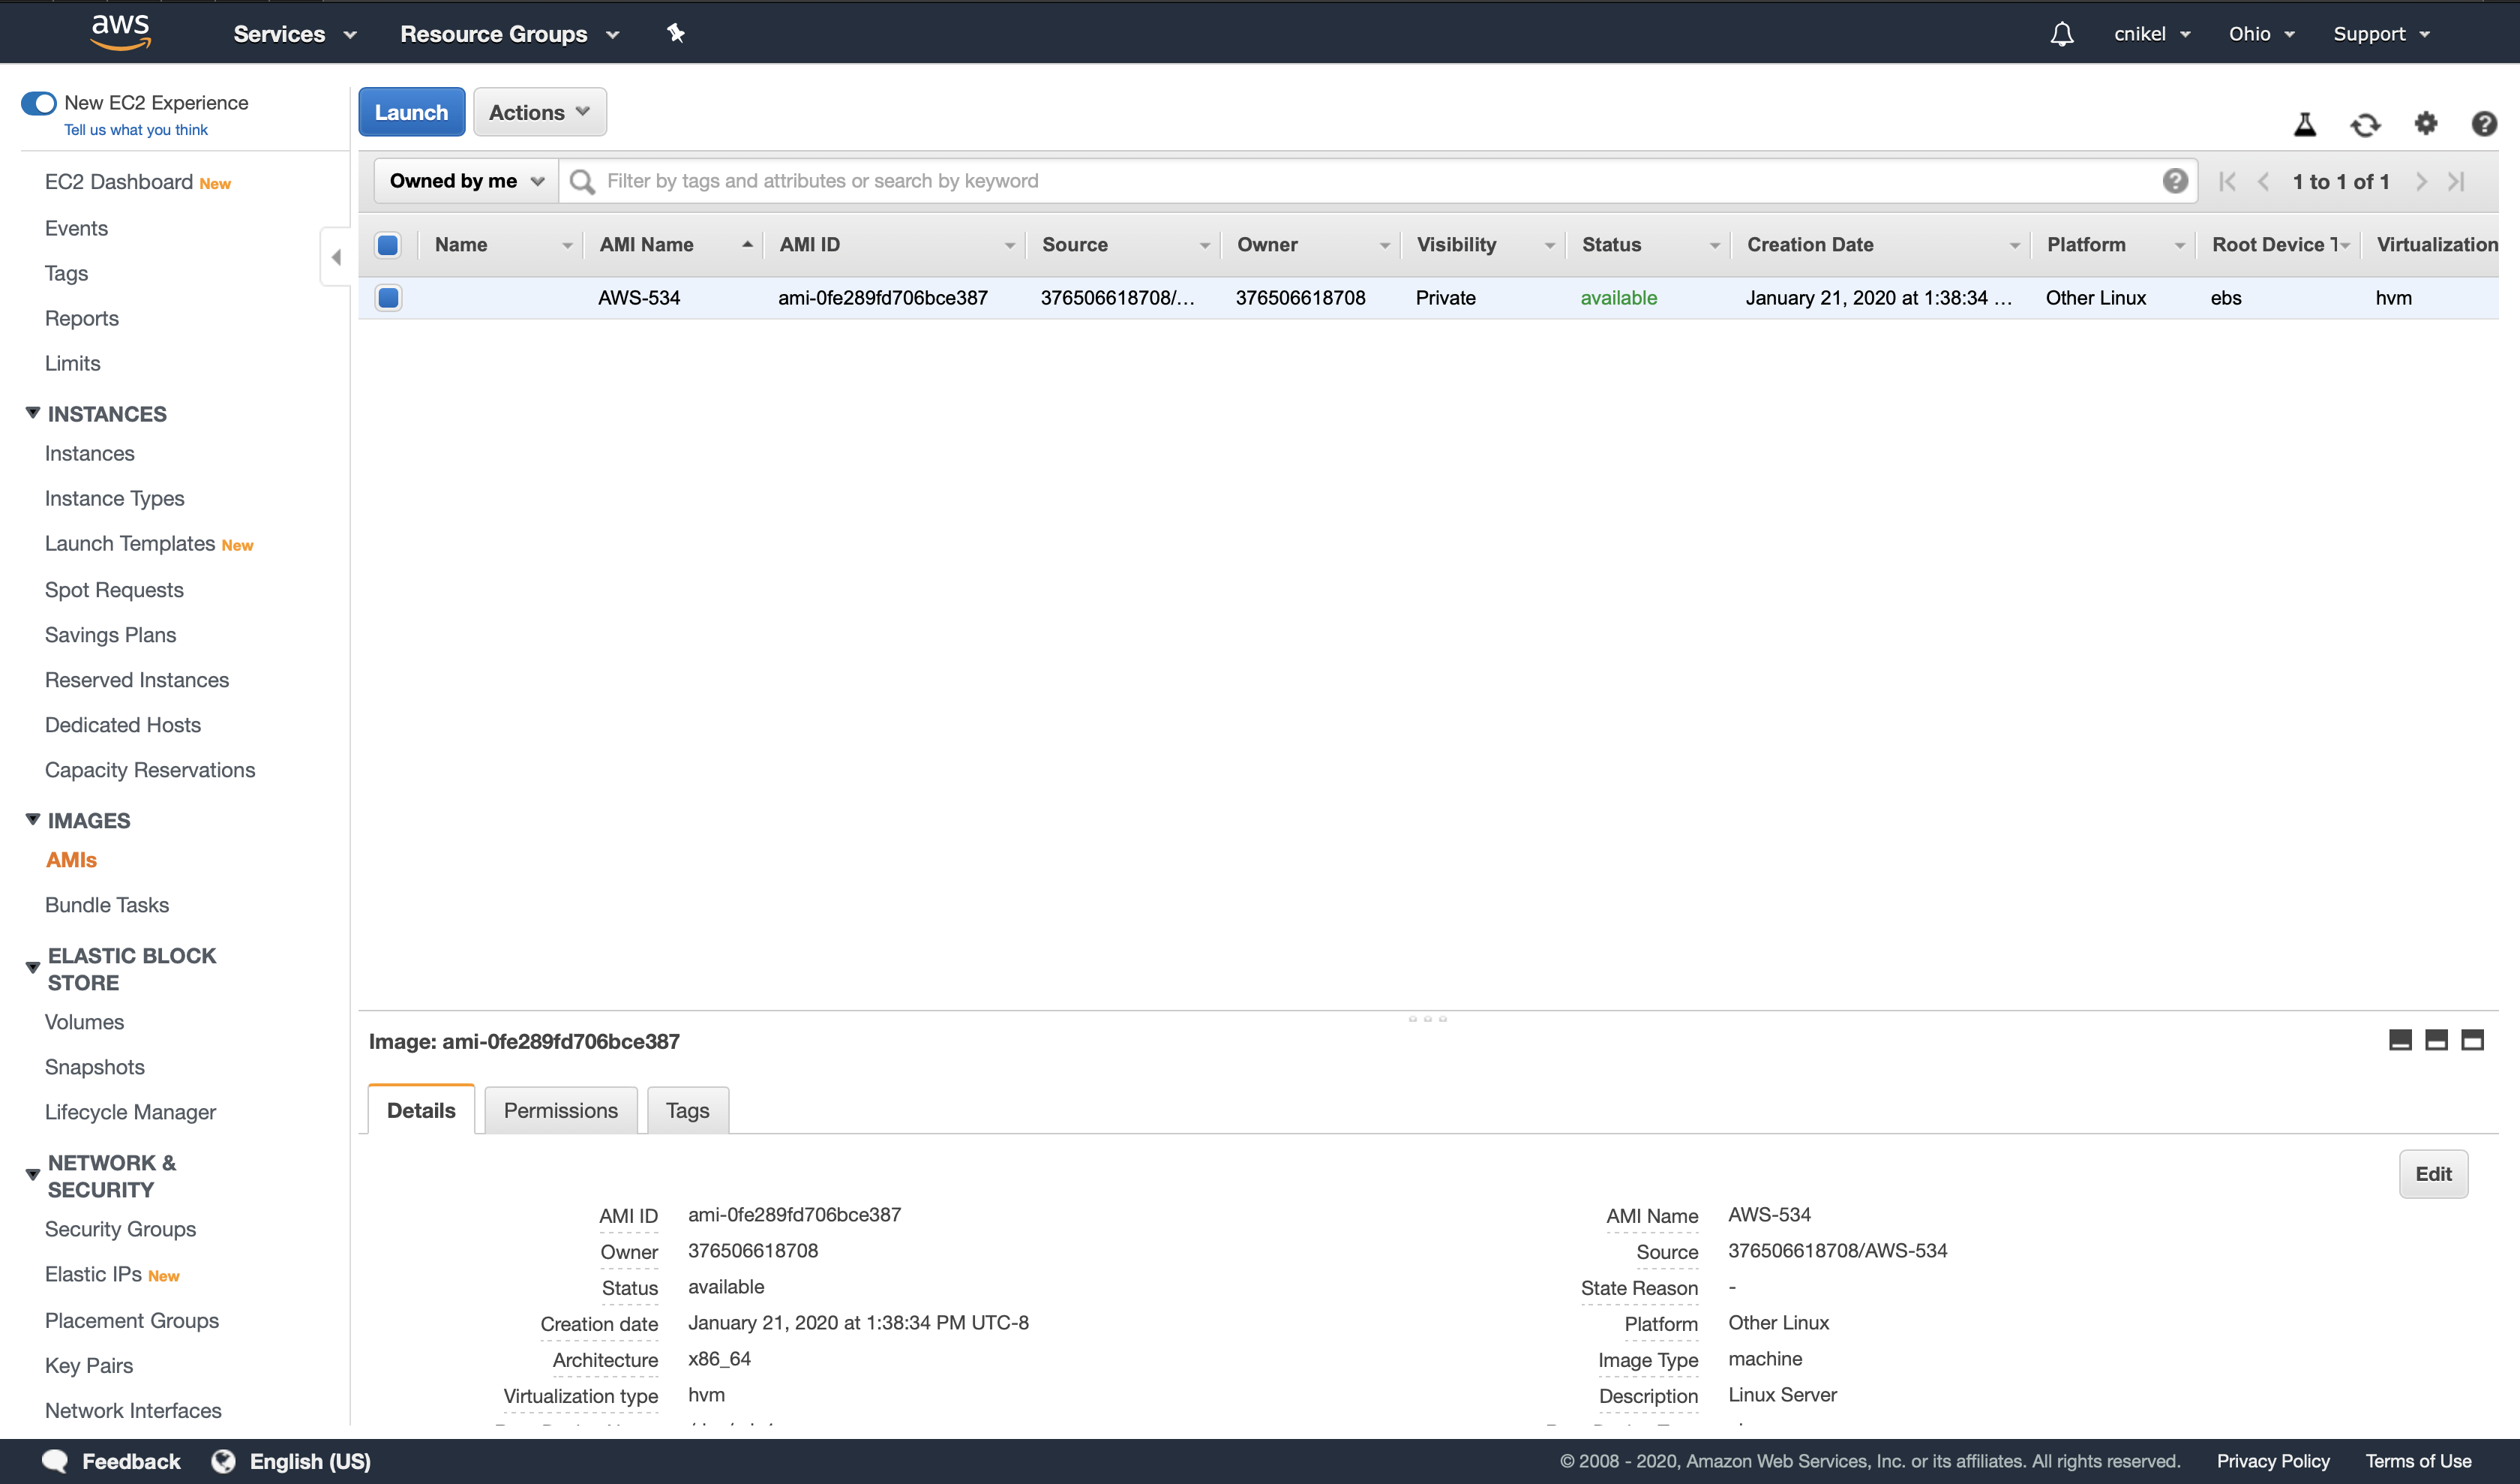

### Exercise 2 - Accessing AWS through the command line

Now that you have acquainted with basic services of AWS, you will now learn to use AWS in a more advanced way (from the command line). First, follow the tutorial [here (for configuration)](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html) and [here (for using)](https://docs.aws.amazon.com/cli/latest/userguide/cli-chap-using.html) to set up AWS command line interface (CLI) on your local computer.
 
We want you to invest some time on this by yourself: go over the documentation (an important skill we hope you acquire is that of learning to read the documentation to extract the information you need). Sometimes it might be a bit frustrating to go through so many resources, but it is important for your to practice this.


You don't actually need to show your results here.

#### Exercise 2.1
rubric={accuracy:15,mechanics:5}

In Exercise 1.2 you stopped the instance you used. Now, using AWS CLI, start the instance once again. Then, stop the instance in sequence. Take a screenshot of the command you used and the output you got.

**start instance:** `cd aws2 ec2 start-instances --instance-ids i-00bbbdcbae0729c47` <br/> **stop instance:** `cd aws2 ec2 stop-instances --instance-ids i-00bbbdcbae0729c47`

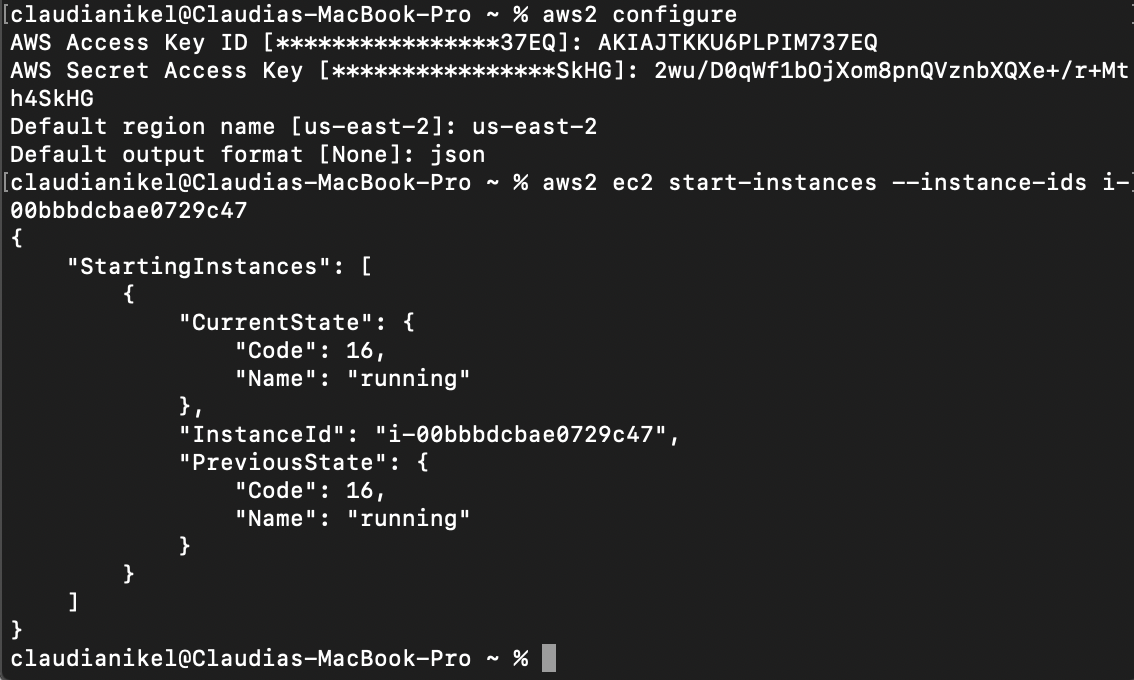

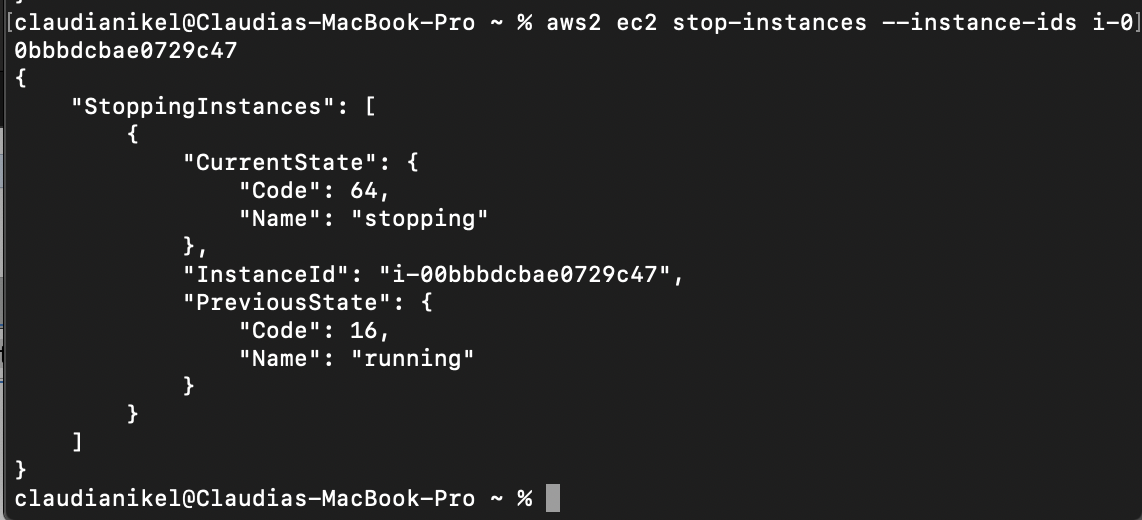

#### Exercise 2.2
rubric={accuracy:15,mechanics:5}

Now, create an S3 bucket. Hint: Type `aws s3api help` or take a look at the online [documentation](https://docs.aws.amazon.com/cli/latest/reference/s3api/index.html). Submit the command that you used to create the bucket.

**Create S3 bucket:** `aws2 s3api create-bucket --bucket my-bucket-cnikel --region us-east-2 --create-bucket-configuration LocationConstraint=us-east-2`

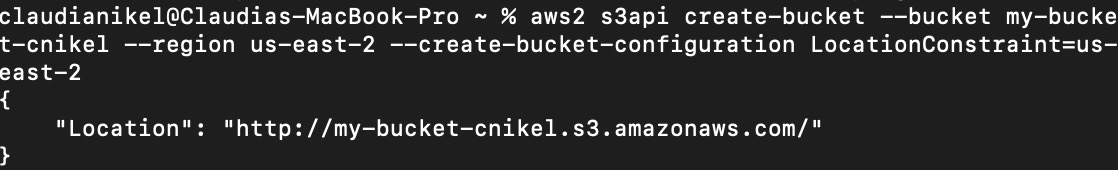

### Exercise 3 - Using S3
rubric={accuracy:15,mechanics:5}

In this exercise you will replicate an analysis (you choose which one) of a dataset you've already done (and for which you have the necessary scripts ready) on EC2 + S3.

1. Using AWS CLI - upload a datafile of your choice to Amazon's S3. How to do this is documented [here](http://docs.aws.amazon.com/cli/latest/userguide/using-s3-commands.html).
2. Take a screenshot of your terminal with the command you used above and  ```> aws s3 ls s3://your_bucket``` to show that you did this succesfully.
3. Launch a new Ubuntu EC2 instance and configure AWS CLI (use the AMI with AWS CLI configured if you have configured it and saved it as an AMI in Exercise 1). This will allow you to access `s3` services from your EC2 instance. Otherwise, you can get the data from S3 via `wget` as described [here](http://docs.aws.amazon.com/AWSEC2/latest/UserGuide/AmazonS3.html).
4. Run the necessary code to install the software you need (if it is not already in the instance) and to run your analysis.
5. Take a screenshot of the outcome to document that you got this working.
6. Using AWS CLI - **terminate the instance**
7. **delete the S3 bucket**
8. **you must delete all your personal AMI and snapshots** at this point if you do not want to incur any charges moving forward.

**Upload a datafile (553_sample.csv) to S3:** `aws2 s3 cp 553_sample.csv s3://my-bucket-cnikel/path/` <br/>
**List what is stored in the bucket:** `aws2 s3 ls s3://my-bucket-cnikel/path/`


In [ ]:
#3.1 and 3.2

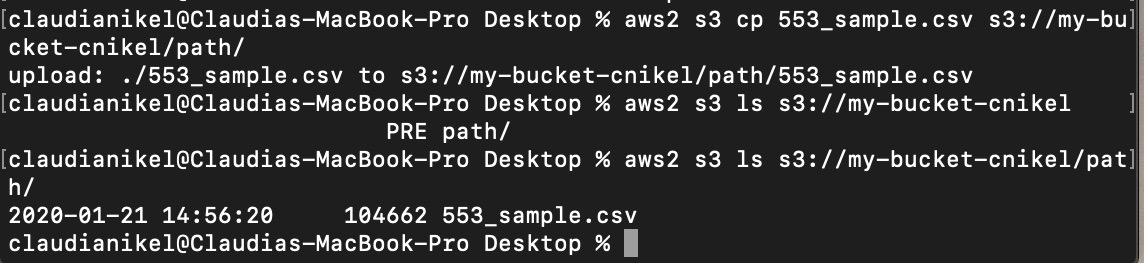

In [ ]:
#3.5

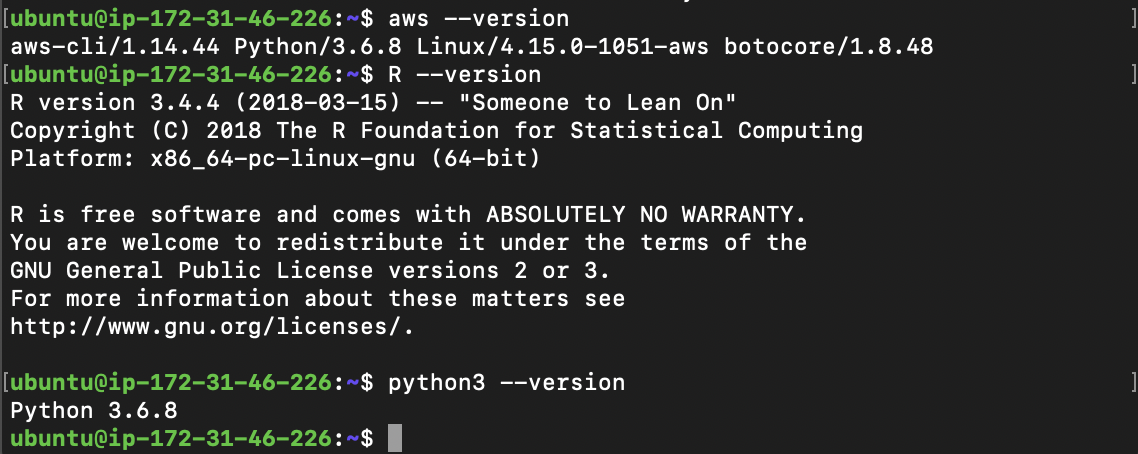

In [ ]:
#3.6

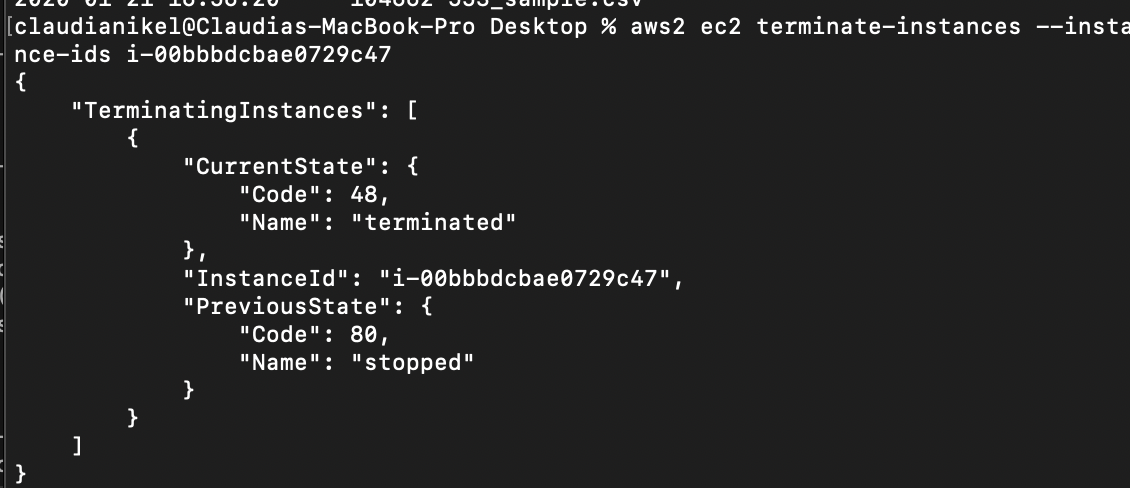

In [ ]:
#3.7

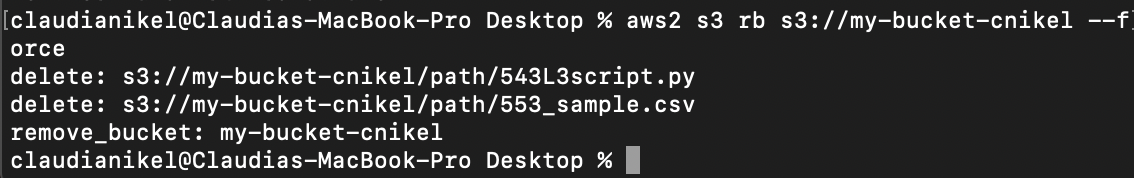

### Exercise 4 (Optional) - Accessing AWS using Python API
rubric={accuracy:1}

Note: To complete this exercise, you should set up AWS CLI on your local computer.
Install AWS Python API: `pip install boto3`. In this exercise you need to (obviously using python and `boto3`):

1. Create a resource `ec2`
1. [Create an instance]((https://boto3.readthedocs.io/en/latest/reference/services/ec2.html#EC2.ServiceResource.create_instances)) (make sure to use the argument `InstanceType='t2.micro'`)
2. Closing all instances. (See [here](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2.html#EC2.ServiceResource.instances) for getting all instances and [here](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/ec2.html#EC2.Instance.terminate) to terminate instances)

A quick [tutorial](https://boto3.readthedocs.io/en/latest/guide/migrationec2.html#launching-new-instances) on how to launch, list, and terminate instances.

In [0]:
# TODO